In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

In [2]:
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis

In [71]:
all_simulations = load_sparc()
simulations = {}
for k,v in all_simulations.items():
    if v.profile.sparc_dict['Q'] == 1:
        simulations[k] = v
inputs = Result(simulations)

In [81]:
aa = Analysis(mcmc(inputs.dataframe, tight={'Inc': 1, 'D': 3, 'Ymass': 25}), name='Experiment')
outputs = aa.Result(simulations=simulations, fast=True)

(0.009143588214562685, 0.09905368515890928)

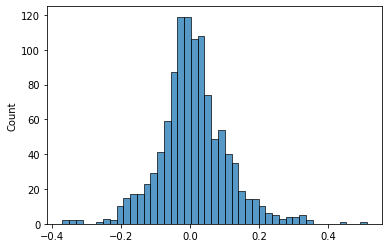

In [82]:
g, data = outputs.residual_hist(query="rel_R > 0.2 & rel_R < 0.8")
data.mean(), data.std()

<AxesSubplot:xlabel='Galaxy in order of SPARC reference parameter value', ylabel='Mass/Luminosity adjustment'>

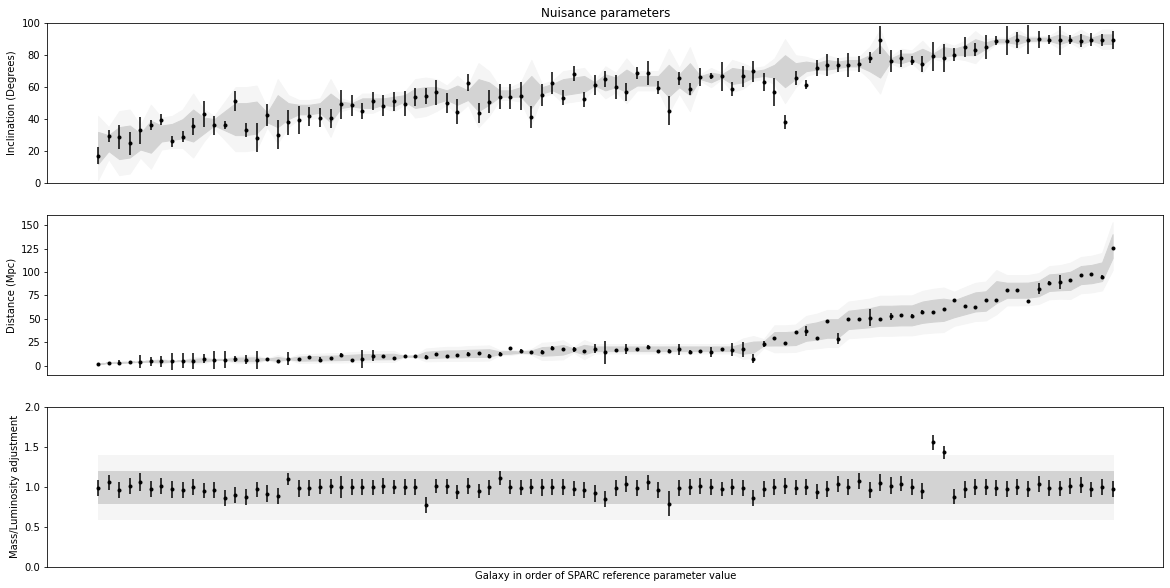

In [83]:
aa.plot_nuissance()

<AxesSubplot:xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

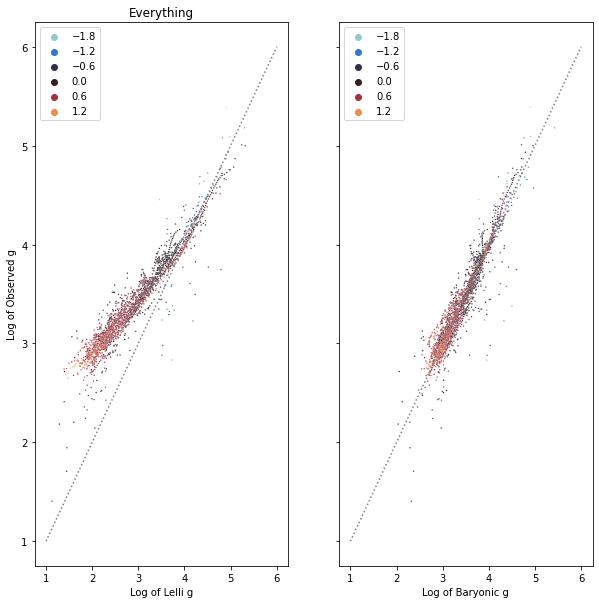

In [85]:
outputs.plot_rar(idens=('V', 'S'))

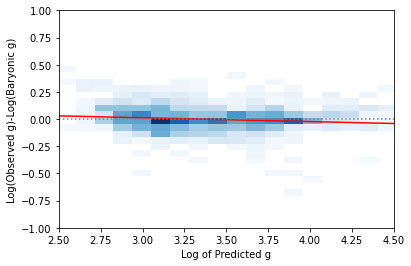

In [86]:
g = outputs.residual(xlim=(2.5,4.5), ylim=(-1,1), xlabel="Log of Predicted g")

In [94]:
aa.uni

{'gamma': array(1.48766782)}

In [79]:
outputs.residual(plot=False).slope

-0.030922542627355627

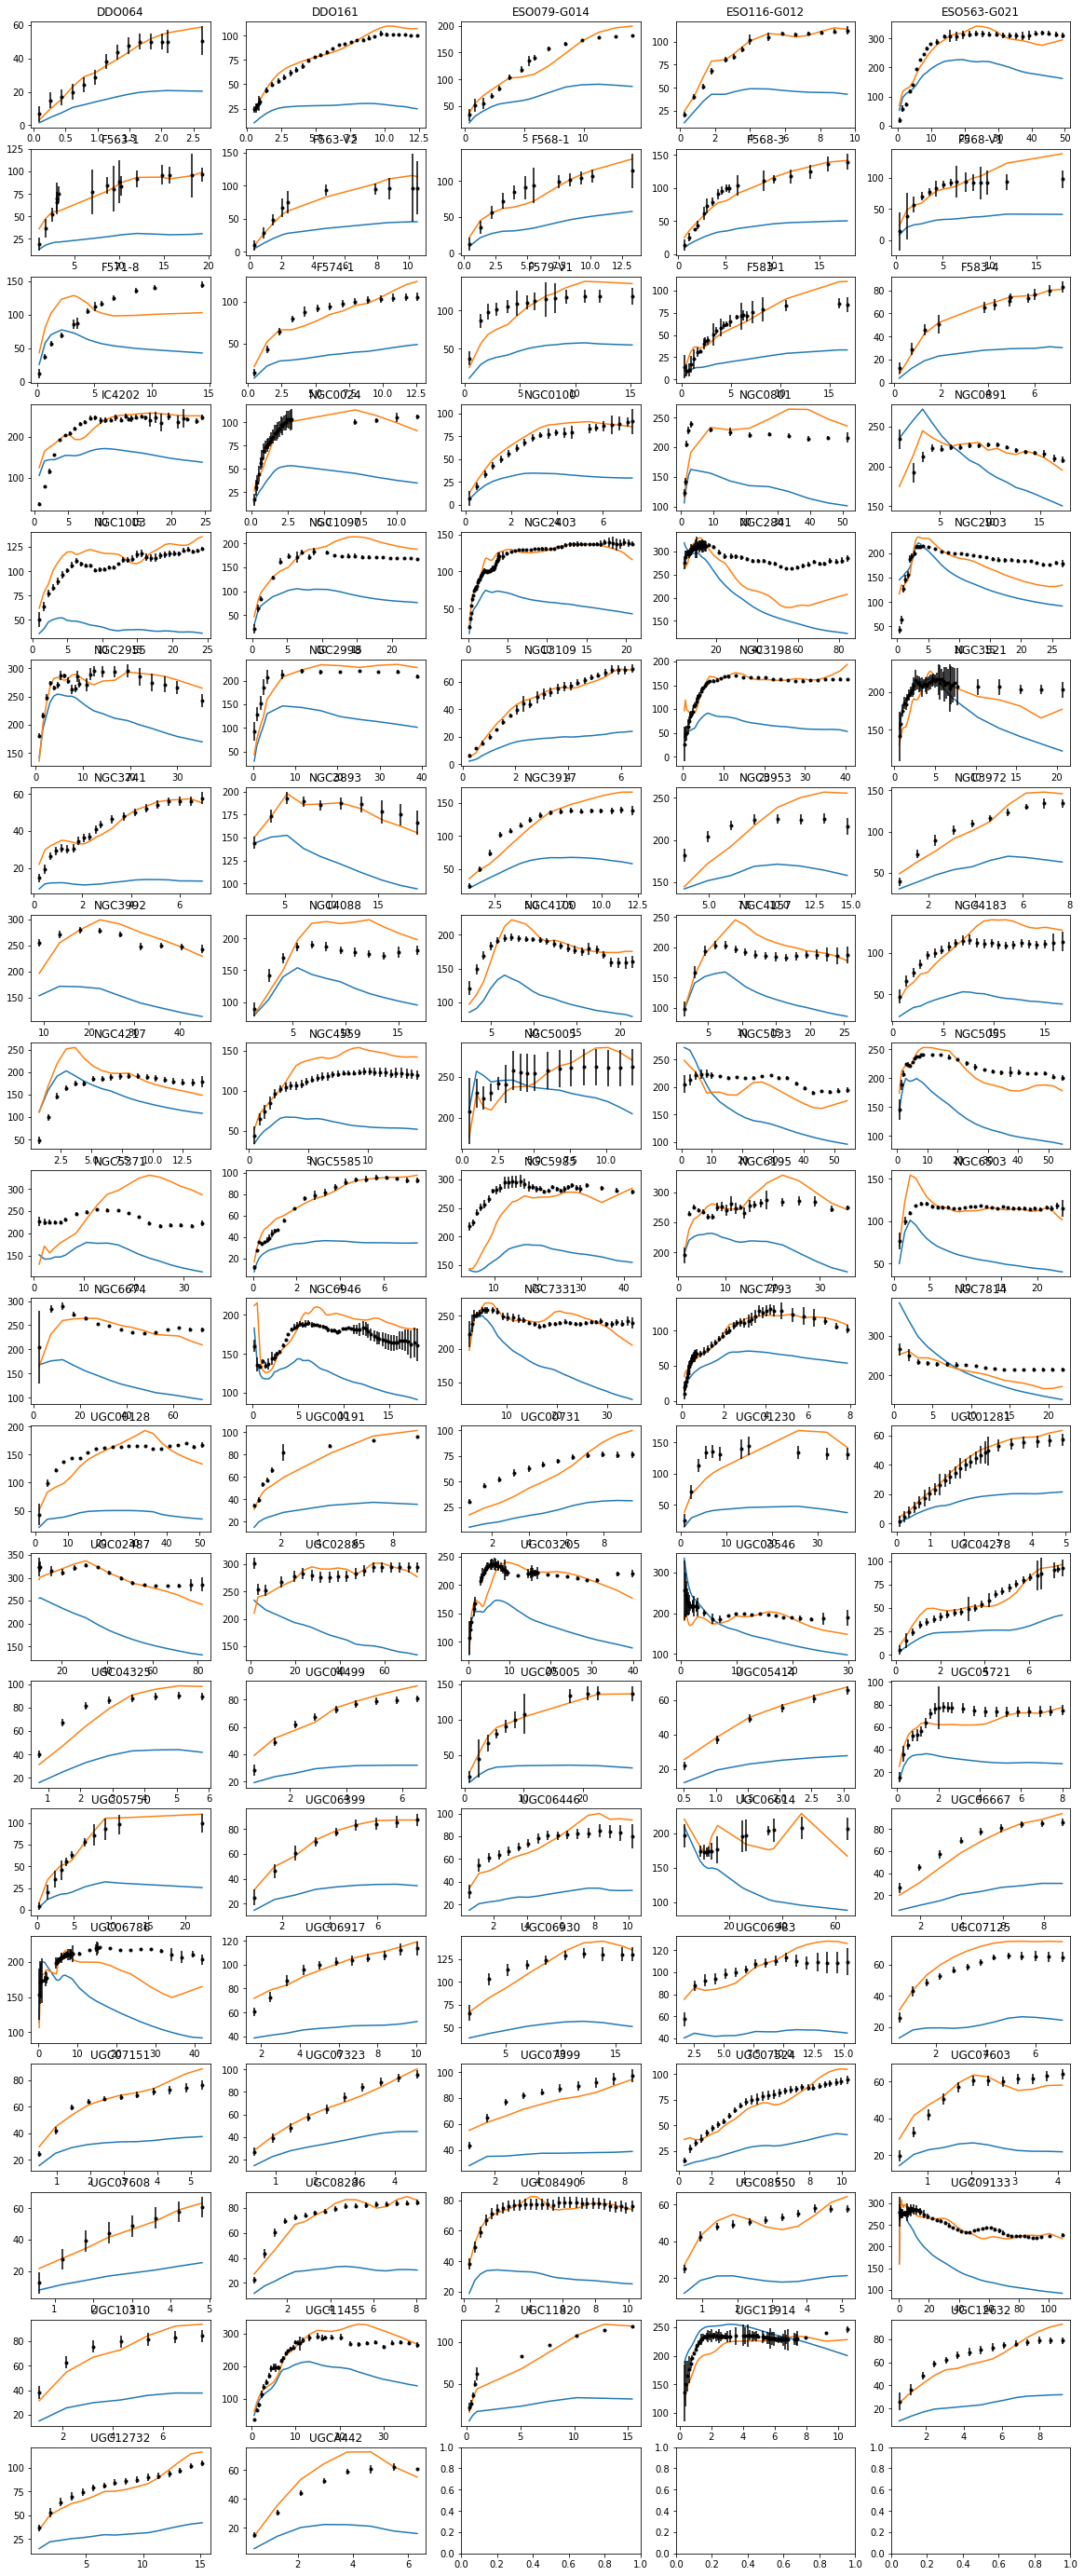

In [91]:
import matplotlib.pyplot as plt

def plot_velocities(smog, cols=5):
    standard = Result(load_sparc('sparc_standard'), smog.adjustments)
    
    groups = smog.dataframe.query('Q == 1').groupby('Galaxy')
    fig, axes = plt.subplots((len(groups)//cols)+1, cols, figsize=(20,50))
    
    i = 0
    for galaxy, df in groups:
        ax = axes[i//cols][i%cols]
        # baryonic
        sdf = standard.dataframe.query('Galaxy=="%s"' % galaxy)
        g = sns.lineplot(x=sdf['R'], y=sdf['Vbar'], ax=ax)
        # smog
        g = sns.lineplot(x=df['R'], y=df['Sbar'], ax=ax)
        # observations
        g.errorbar(df['R'], df['Vobs'], yerr=df['e_Vobs'], fmt='.k')
        # labels
        g.set(title=galaxy, xlabel=None, ylabel=None)
        i += 1

plot_velocities(outputs)

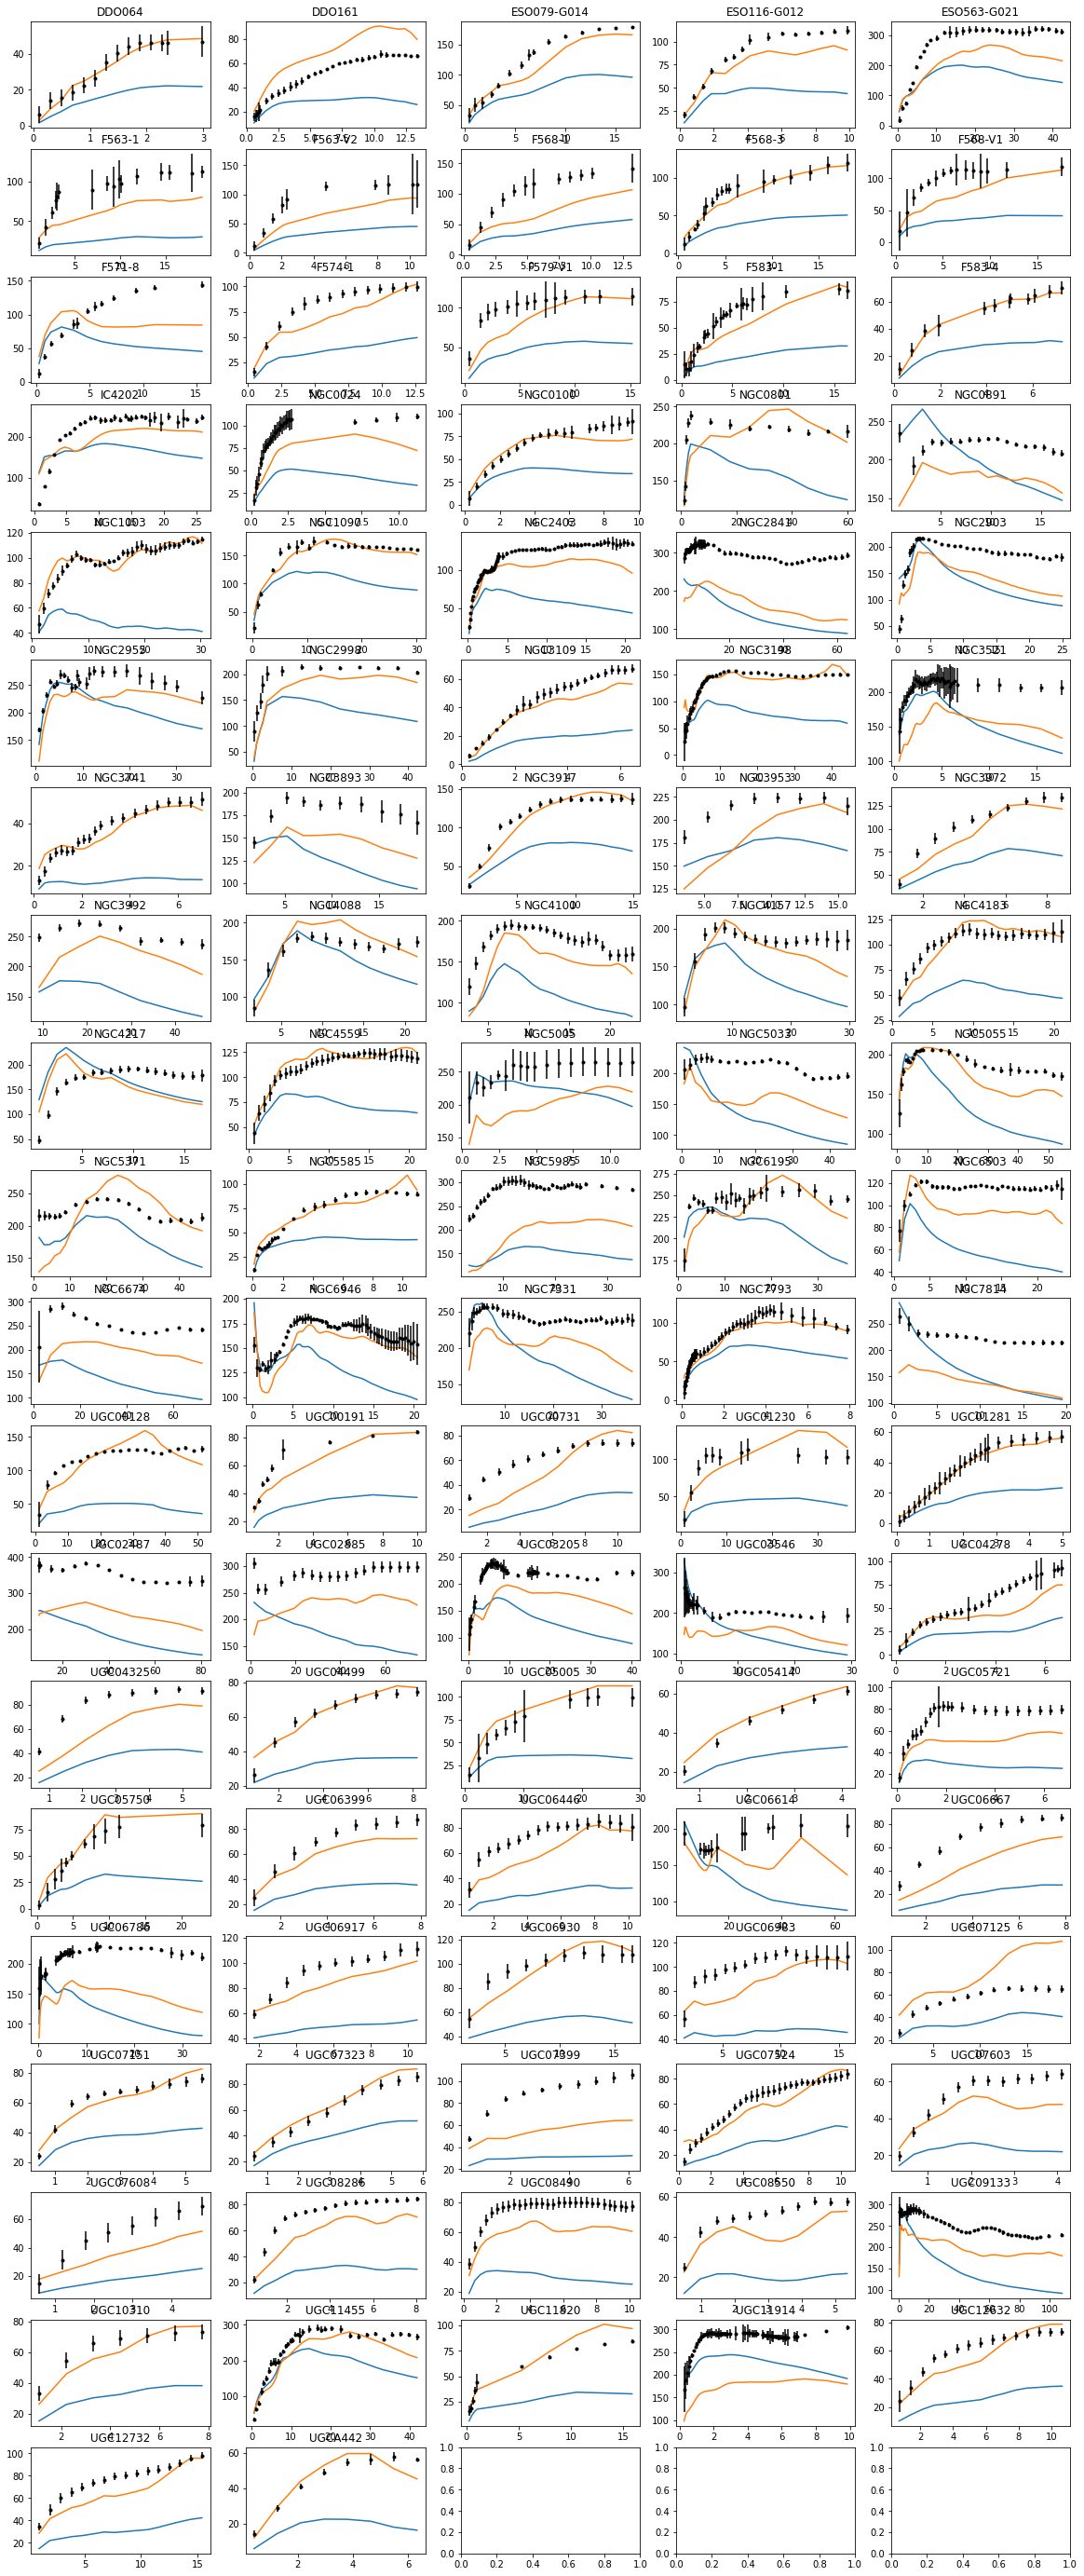

In [92]:
plot_velocities(inputs)